In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 🔍 Reasons for Model Overfitting in Deep Learning

1. **Complex Model Architecture**  
   - Too many layers or neurons relative to the training data size can cause the model to memorize the data.

2. **Insufficient Training Data**  
   - When the dataset is too small, the model easily learns noise and patterns specific only to the training set.

3. **Lack of Regularization**  
   - Absence of techniques like L1/L2 regularization allows weights to grow too large, leading to overfitting.

4. **Too Many Epochs (Overtraining)**  
   - Training the model for too many iterations can make it memorize the training data rather than generalize.

5. **Noisy or Irrelevant Features**  
   - If the input data contains irrelevant or noisy features, the model may learn spurious correlations.

6. **Low Bias Algorithms**  
   - Very flexible models like deep neural networks with low bias are prone to high variance, thus overfitting.

---

### ✅ Ways to Handle Overfitting in Deep Learning

1. **Early Stopping**
   - Monitor validation loss and stop training when performance on the validation set starts degrading.

2. **Dropout**
   - Randomly deactivates a fraction of neurons during training to prevent reliance on specific paths.

3. **Data Augmentation**
   - Generate more training data via transformations (flipping, rotation, zoom, etc.) to improve generalization.

4. **L1 / L2 Regularization**
   - Penalizes large weights in the loss function to keep the model simpler and more general.

5. **Reduce Model Complexity**
   - Use fewer layers or neurons to prevent the model from being excessively expressive.

6. **Batch Normalization**
   - Helps stabilize and regularize training by normalizing inputs to layers.

7. **Cross-Validation**
   - Evaluate the model on multiple subsets of the data to ensure generalization.

8. **Increase Training Data**
   - More diverse data helps the model learn general patterns rather than memorizing the training set.

---



In [2]:
import tensorflow 
import numpy as np 
from sklearn.datasets import make_moons
import seaborn as sns 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dropout

2025-07-25 19:07:52.264402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753470472.579074      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753470472.673094      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
X,y=make_moons(100,noise=0.25,random_state=2)

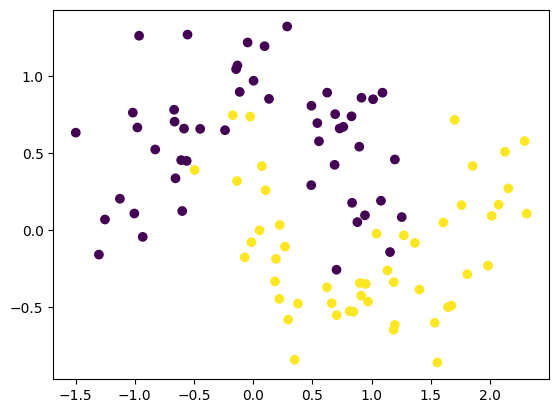

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
model= Sequential()

In [6]:
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-25 19:08:13.259499: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
adam=Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.fit(X,y,epochs=200,validation_split=0.2,verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.5516 - loss: 1.0412 - val_accuracy: 0.8500 - val_loss: 0.7001
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6070 - loss: 0.8404 - val_accuracy: 0.9500 - val_loss: 0.3505
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8180 - loss: 0.4765 - val_accuracy: 0.7500 - val_loss: 0.4270
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6820 - loss: 0.4772 - val_accuracy: 0.8500 - val_loss: 0.2597
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7203 - loss: 0.4435 - val_accuracy: 0.9000 - val_loss: 0.2574
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8359 - loss: 0.4242 - val_accuracy: 0.9000 - val_loss: 0.2747
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8422 - loss: 0.4027 - val_accuracy: 0.9500 - val_loss: 0.2488
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7727 - loss: 0.4023 - val_accuracy: 0.9500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

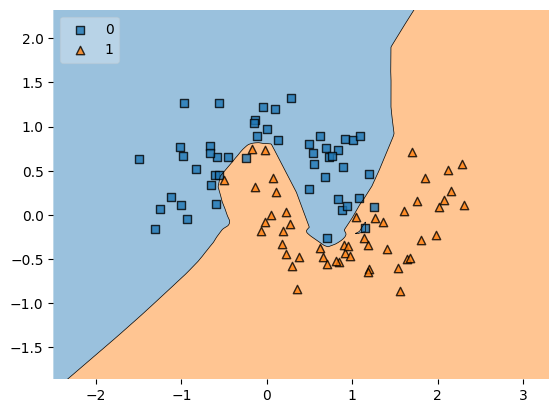

In [8]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

In [9]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

In [10]:
adam=Adam(learning_rate=0.1)
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
model2.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.4641 - loss: 4.6559 - val_accuracy: 0.8500 - val_loss: 4.4531
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7250 - loss: 4.4149 - val_accuracy: 0.9000 - val_loss: 4.2274
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8203 - loss: 4.1847 - val_accuracy: 0.9000 - val_loss: 4.0124
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7734 - loss: 3.9765 - val_accuracy: 0.9000 - val_loss: 3.8070
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8164 - loss: 3.7641 - val_accuracy: 0.9000 - val_loss: 3.6129
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8125 - loss: 3.5683 - val_accuracy: 0.9000 - val_loss: 3.4279
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8320 - loss: 3.3808 - val_accuracy: 0.9000 - val_loss: 3.2500
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8359 - loss: 3.2066 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

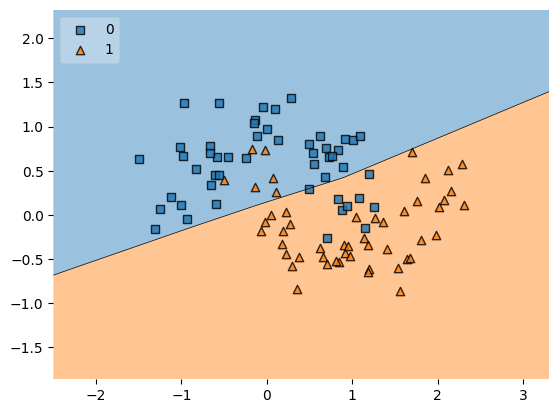

In [12]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)

[]

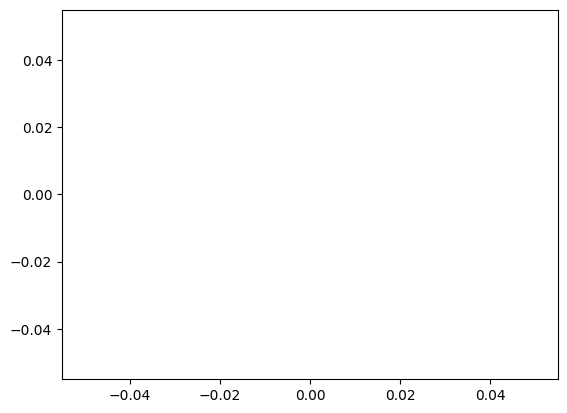

In [13]:
plt.plot()